# Import Dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
import yfinance as yf
print(yf.__version__)

0.2.41


In [3]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

from datetime import datetime

# Get Data

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,AMAZON
2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,AMAZON
2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,AMAZON
2024-07-30,184.720001,185.860001,179.380005,181.710007,181.710007,39508600,AMAZON
2024-07-31,185.050003,187.940002,184.460007,186.979996,186.979996,41667300,AMAZON
2024-08-01,189.289993,190.600006,181.869995,184.070007,184.070007,70435600,AMAZON
2024-08-02,166.750000,168.770004,160.550003,167.899994,167.899994,141448400,AMAZON
2024-08-05,154.210007,162.960007,151.610001,161.020004,161.020004,83149400,AMAZON
2024-08-06,161.710007,165.080002,158.539993,161.929993,161.929993,59858500,AMAZON


# Descriptive Statistics about the Data

(array([253.,   0.,   0., 253.,   0.,   0., 253.,   0.,   0., 253.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

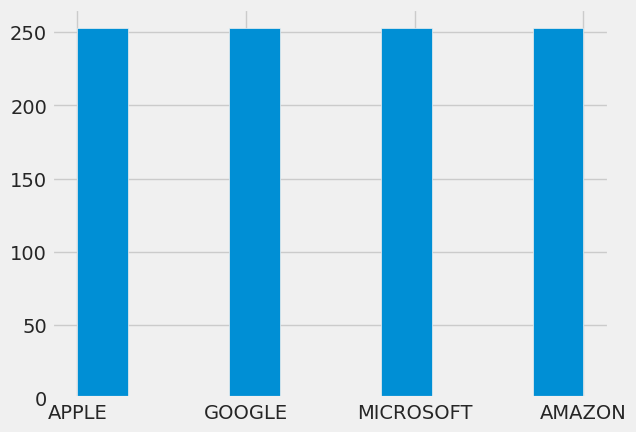

In [5]:
plt.hist(df.company_name)

In [6]:
for company in company_list:
    print(company.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-08-07 to 2024-08-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-08-07 to 2024-08-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float6

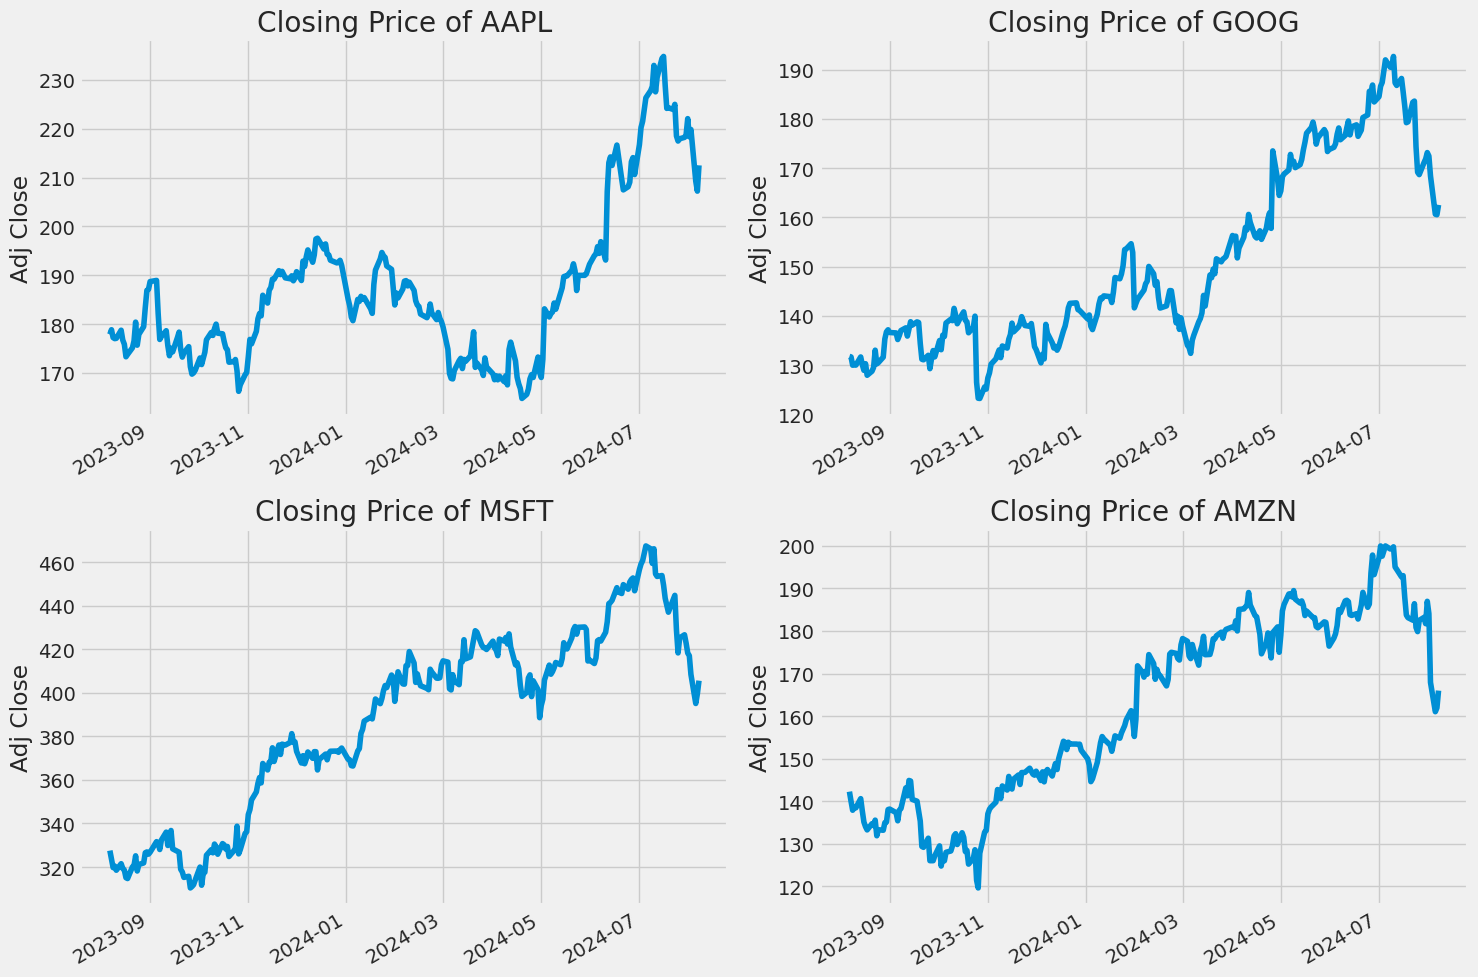

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

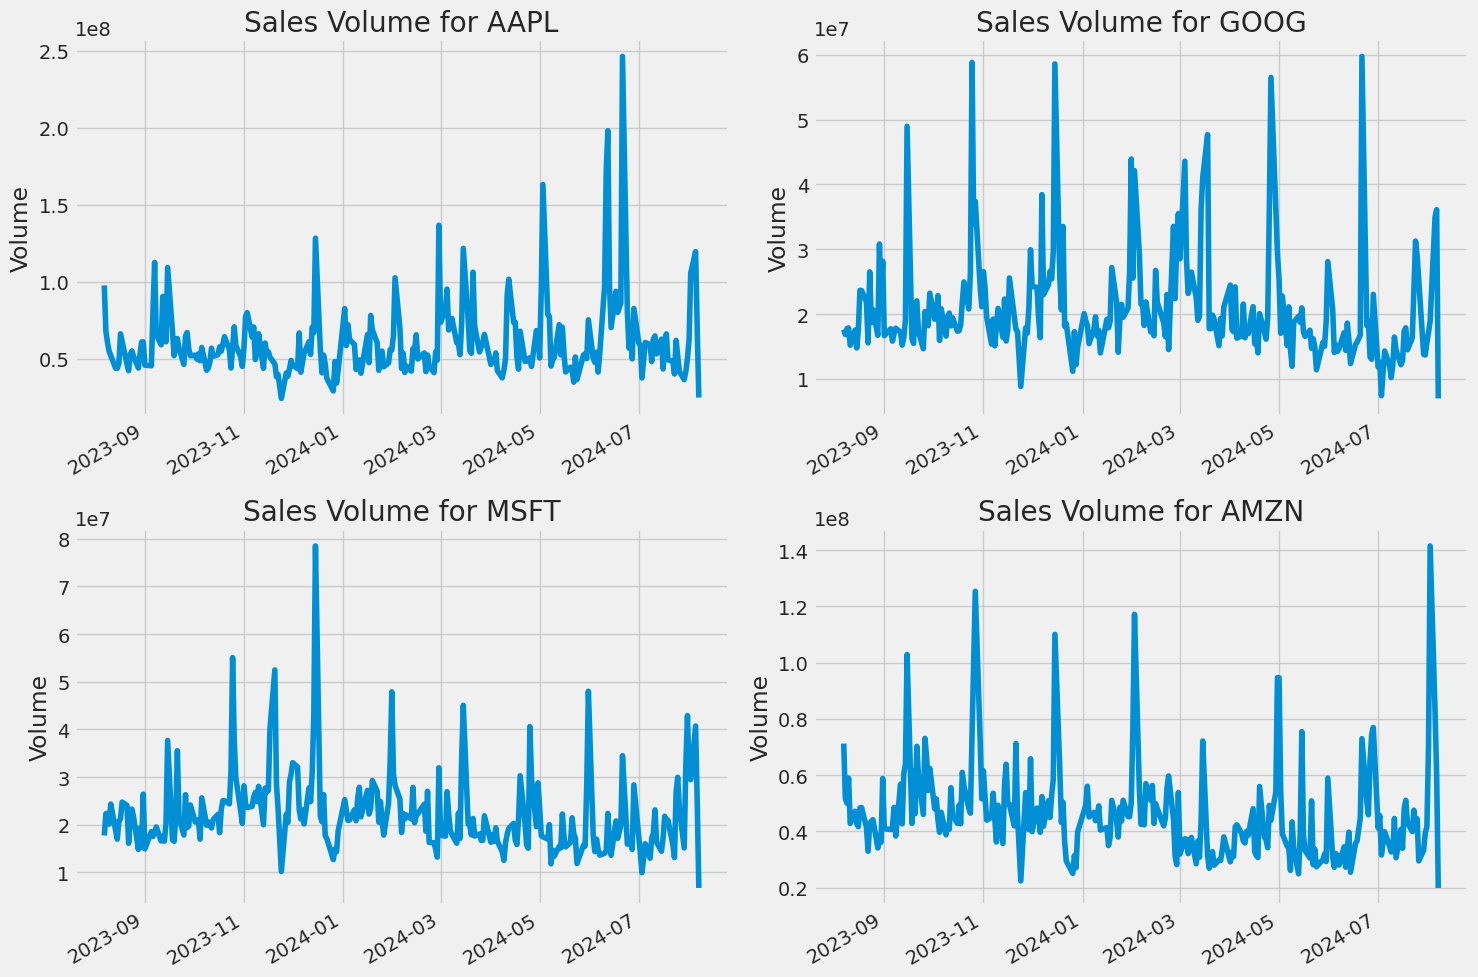

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

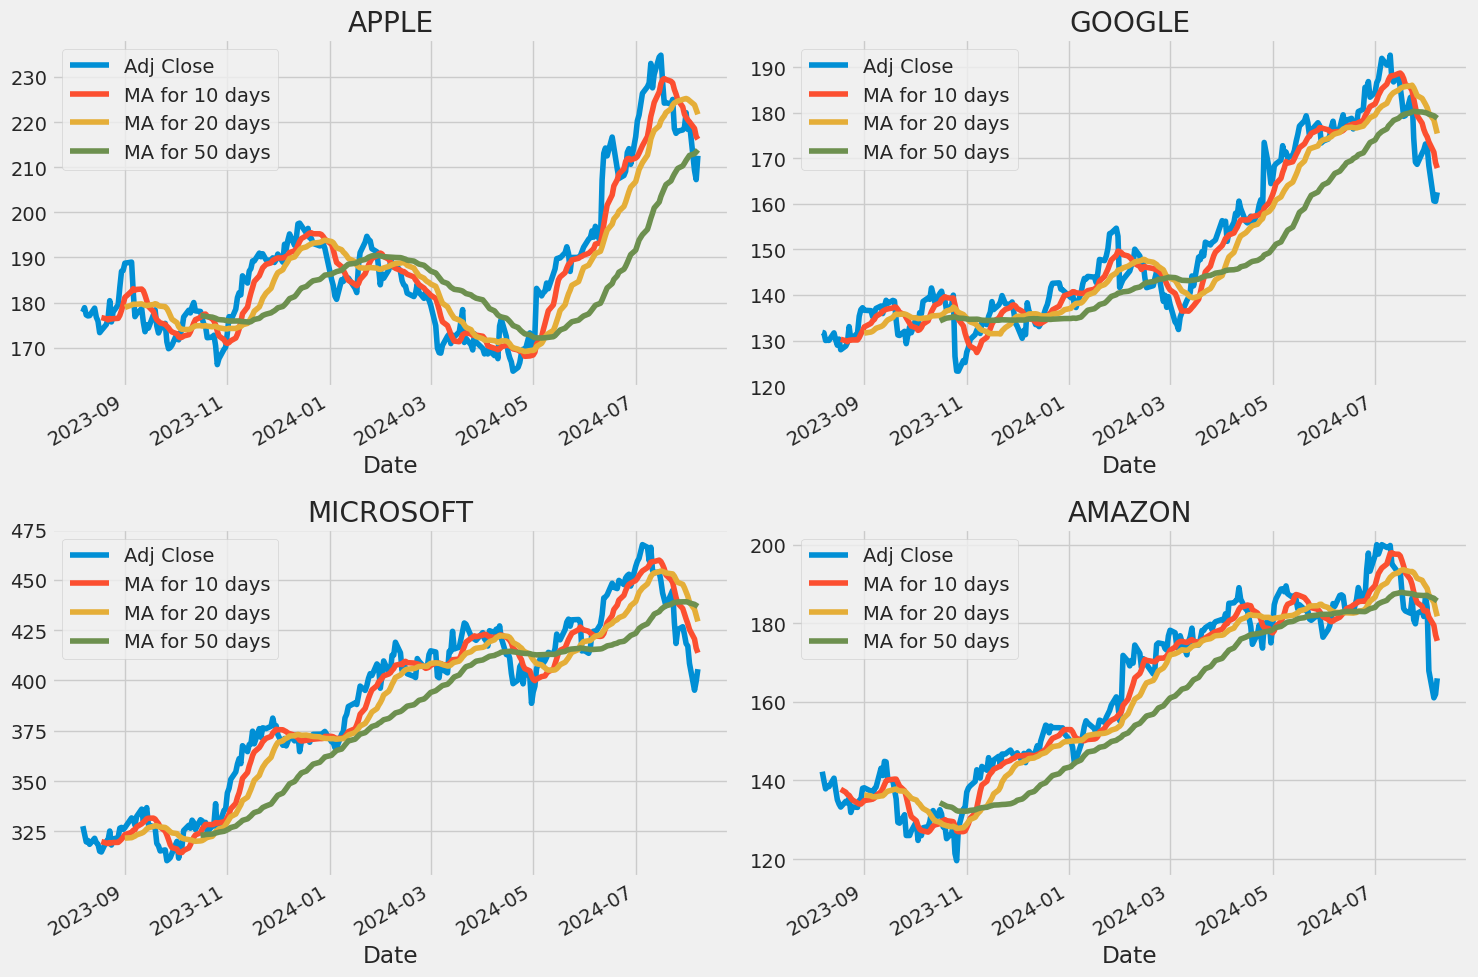

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

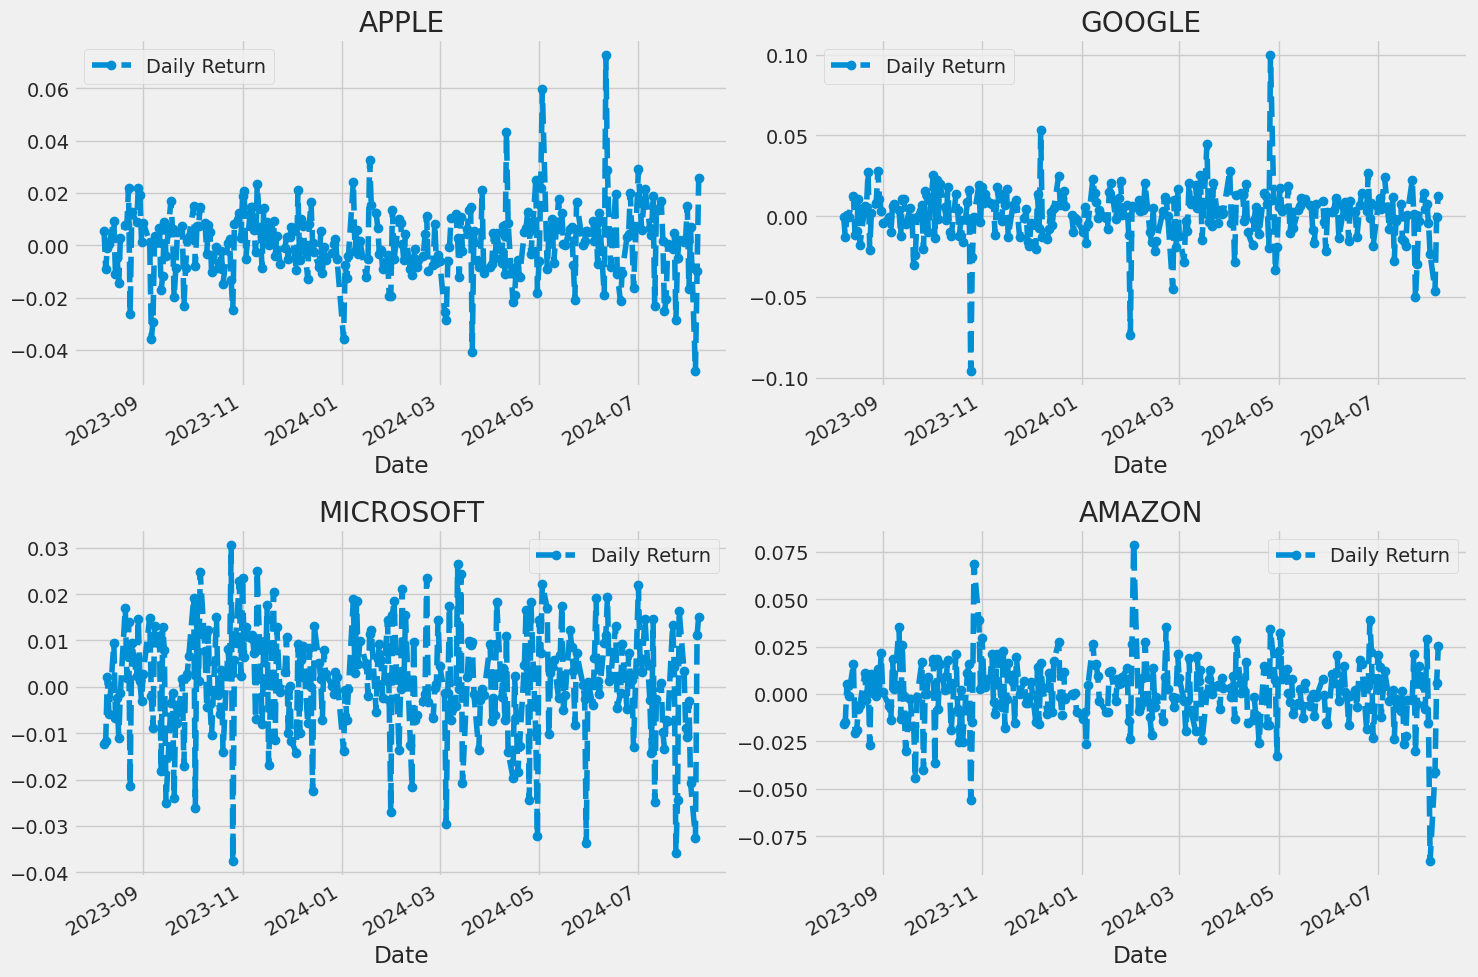

In [10]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

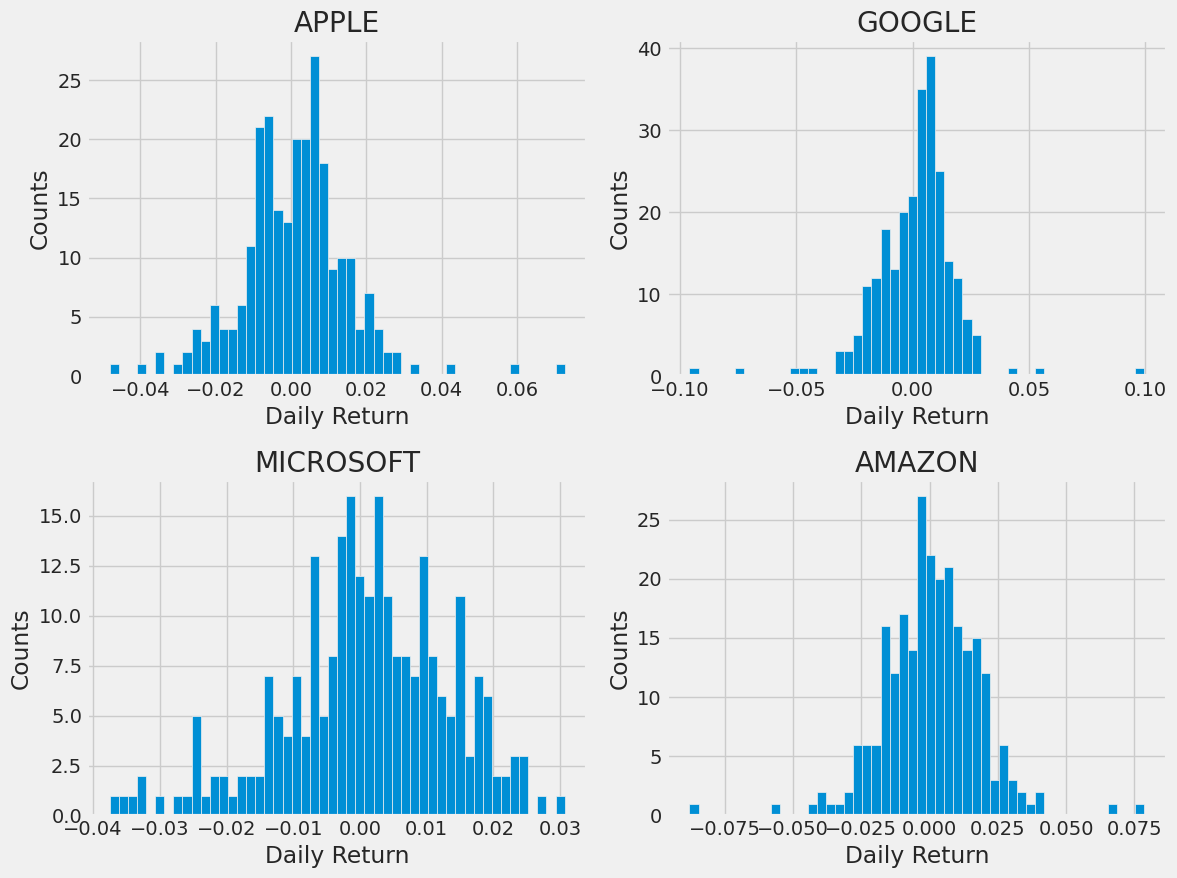

In [11]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [12]:
tech_rets = pd.concat([AAPL['Daily Return'], GOOG['Daily Return'], MSFT['Daily Return'], AMZN['Daily Return']], axis=1, join='inner')
tech_rets.columns = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
tech_rets


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-08-07,NaN,NaN,NaN,NaN
2023-08-08,0.005312,-0.000758,-0.012299,-0.016031
2023-08-09,-0.008954,-0.012819,-0.011716,-0.014935
2023-08-10,-0.001234,0.000461,0.002172,0.005150
2023-08-11,0.000338,-0.000307,-0.005946,-0.001083
...,...,...,...,...
2024-08-01,-0.016751,-0.004043,-0.002964,-0.015563
2024-08-02,0.006869,-0.023485,-0.020666,-0.087847
2024-08-05,-0.048167,-0.046081,-0.032657,-0.040977


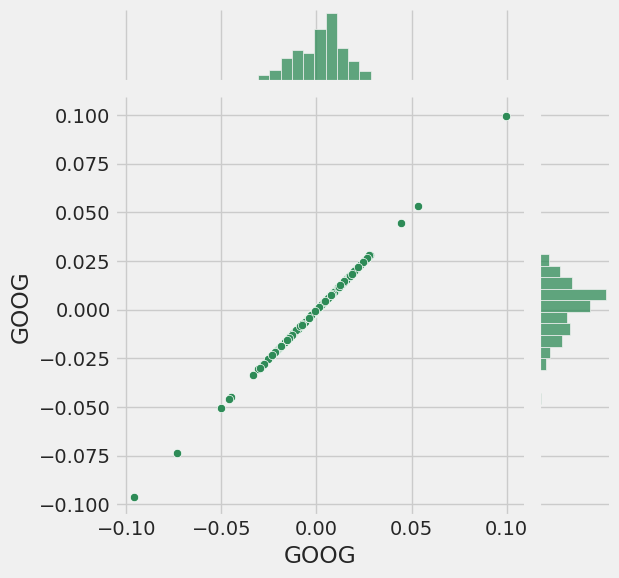

In [13]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

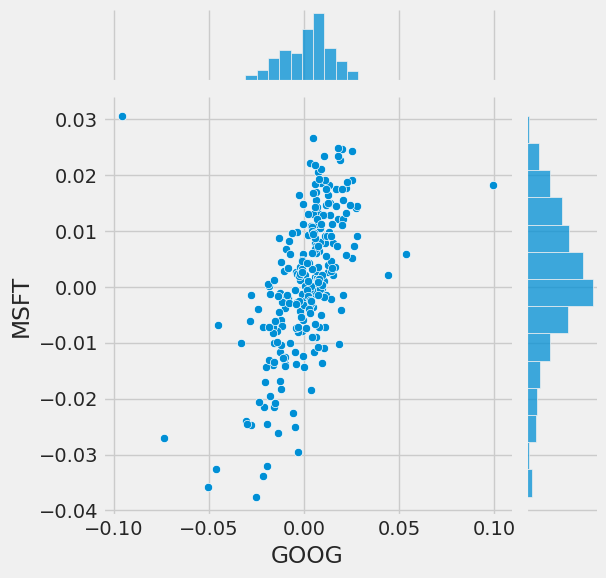

In [14]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

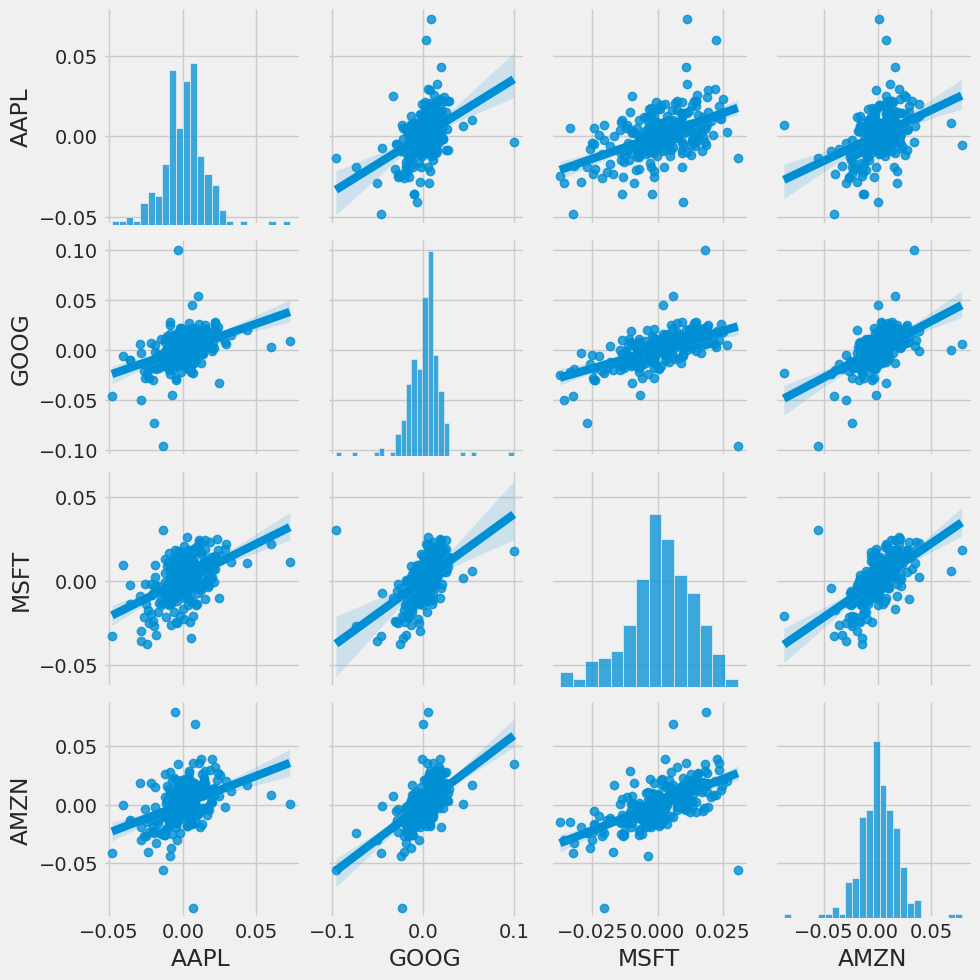

In [15]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

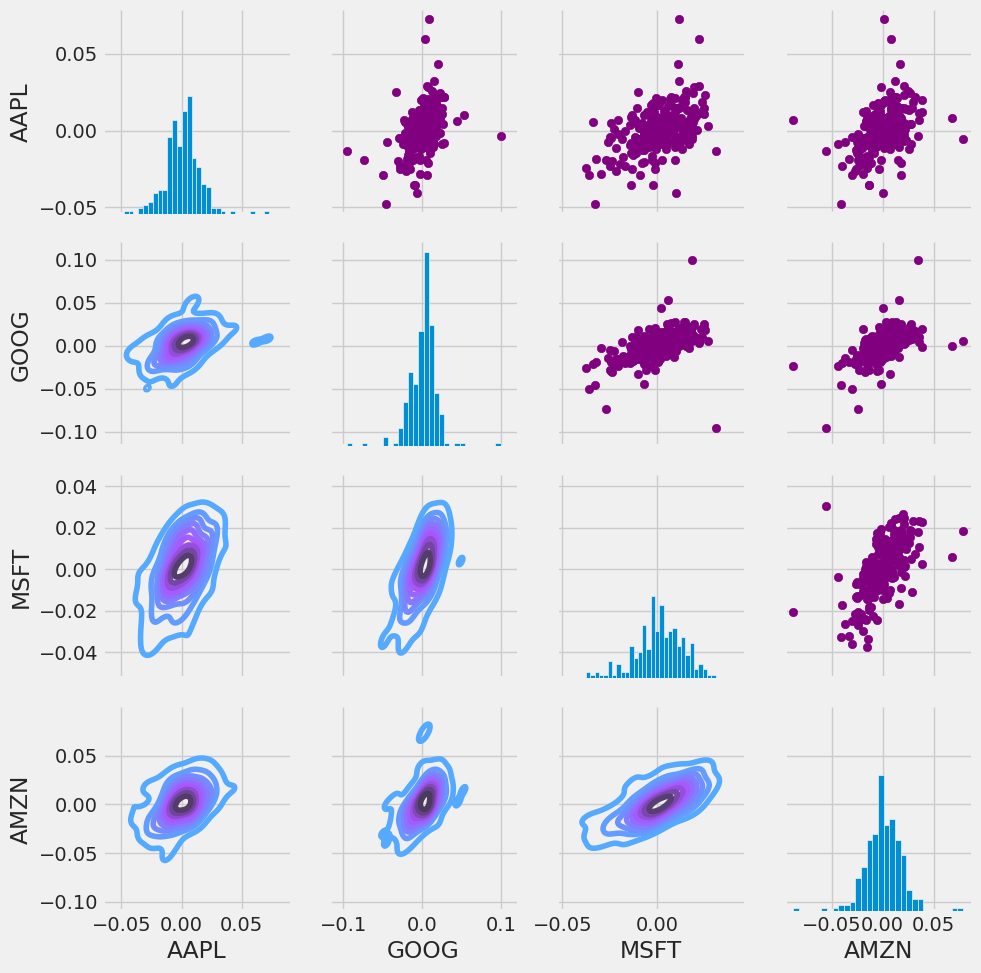

In [16]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock return')

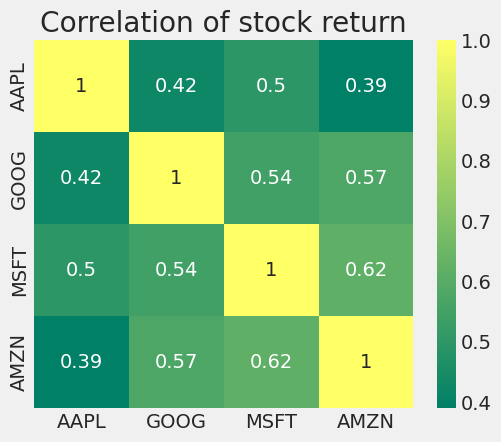

In [17]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

Basically what is expected to earn everyday vs the deviation possible

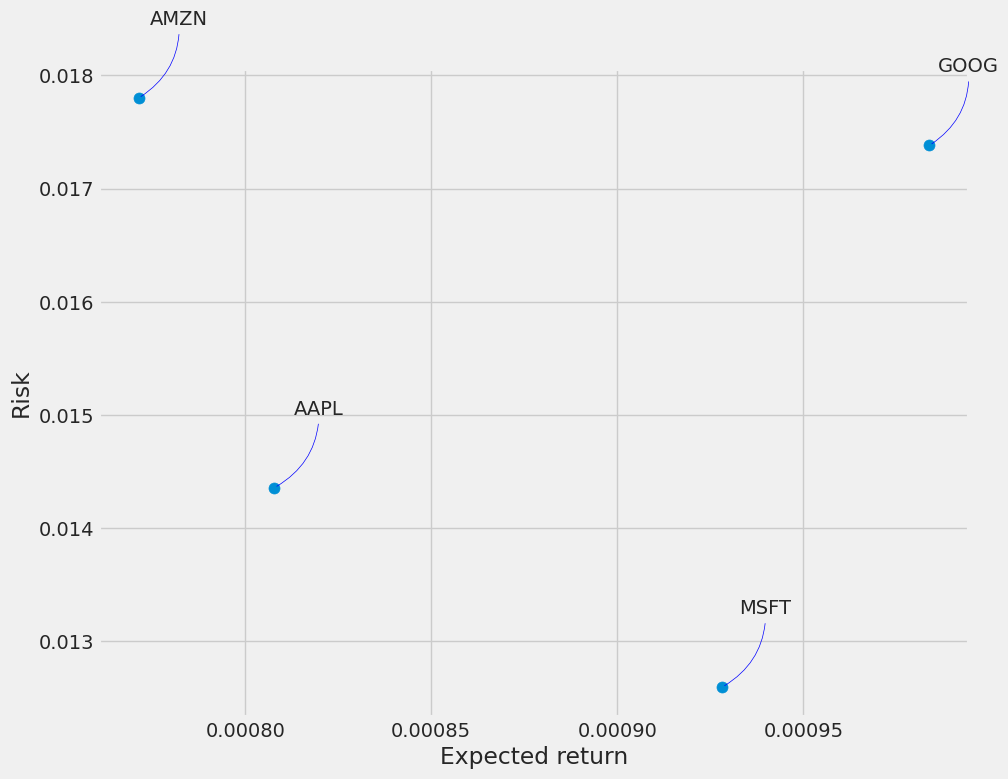

In [18]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price of Google inc:

In [19]:
end = datetime.now()
start = datetime(end.year - 13, end.month, end.day)
microsoft_stock = yf.download('MSFT', start, end)

[*********************100%%**********************]  1 of 1 completed


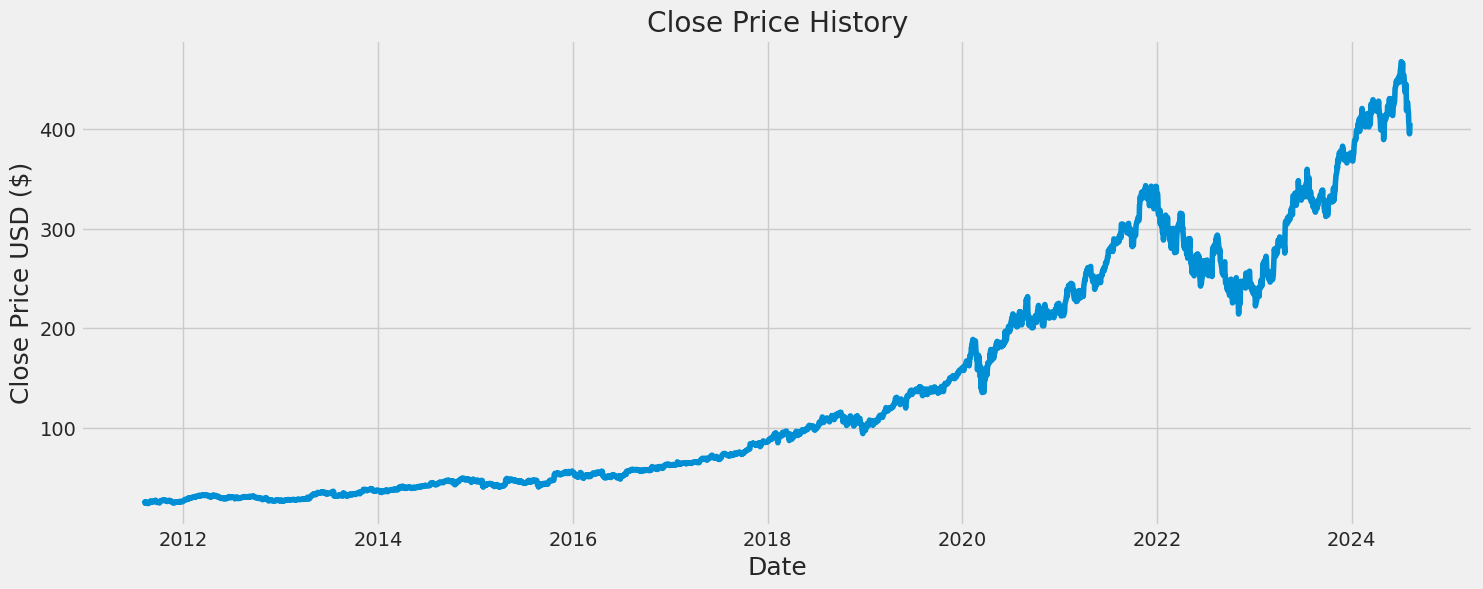

In [20]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(microsoft_stock['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column
data = microsoft_stock.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3108

In [22]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-08-07 17:54:36.516555: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-07 17:54:36.517939: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 17:54:36.524983: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 17:54:36.539051: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 17:54:36.558088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [33]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.12719239e-03],
       [3.60701652e-03],
       [4.95967405e-04],
       ...,
       [8.36759989e-01],
       [8.46814526e-01],
       [8.60848085e-01]])

In [34]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00112719, 0.00360702, 0.00049597, 0.00272781, 0.00252491,
       0.00344921, 0.00308851, 0.00286307, 0.00155553, 0.00015781,
       0.        , 0.00166824, 0.00207403, 0.00133009, 0.00286307,
       0.00419316, 0.00507237, 0.00590649, 0.00502728, 0.00410298,
       0.00344921, 0.00455386, 0.00504982, 0.00396772, 0.00430587,
       0.00464404, 0.00568105, 0.0067857 , 0.00707877, 0.00728166,
       0.00676315, 0.00453131, 0.00243474, 0.00243474, 0.0032914 ,
       0.00380991, 0.00360702, 0.00331395, 0.00205149, 0.00123991,
       0.00306596, 0.00430587, 0.00532035, 0.00511745, 0.00667298,
       0.00680824, 0.00671807, 0.00721403, 0.00741693, 0.00676315,
       0.0075071 , 0.00710131, 0.00689842, 0.00716894, 0.00723658,
       0.00637991, 0.00588395, 0.00737184, 0.00676315, 0.00597412])]
[0.0045313139408231715]

[array([0.00112719, 0.00360702, 0.00049597, 0.00272781, 0.00252491,
       0.00344921, 0.00308851, 0.00286307, 0.00155553, 0.00015781,
       0.        , 0.00166824, 0.

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
es = EarlyStopping(patience=3, restore_best_weights=True)

history_LSTM = model.fit(x_train, y_train,
                              validation_split=0.2,
                              batch_size=16,
                              epochs=100,
                              callbacks=[es],verbose=1)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - loss: 0.0037 - val_loss: 8.2542e-04
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 38s 162ms/step - loss: 8.2802e-05 - val_loss: 7.7137e-04
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 29s 191ms/step - loss: 7.8049e-05 - val_loss: 5.2485e-04
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 29s 193ms/step - loss: 9.2462e-05 - val_loss: 5.6173e-04
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 30s 192ms/step - loss: 6.9338e-05 - val_loss: 7.4411e-04
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 177ms/step - loss: 7.5471e-05 - val_loss: 4.2798e-04
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 176ms/step - loss: 7.3973e-05 - val_loss: 4.8534e-04
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - loss: 9.4965e-05 - val_loss: 3.7513e-04
Epoch 9/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - loss: 7.1218e-05 - val_loss: 4.6650e-04
Epoch 10/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 27s 175ms/step - loss: 6.0975e-05 - val_loss: 3.3965e-04
Epoch 11/100
153/153 ━━

In [40]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step


7.636277532731417

/tmp/ipykernel_369257/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


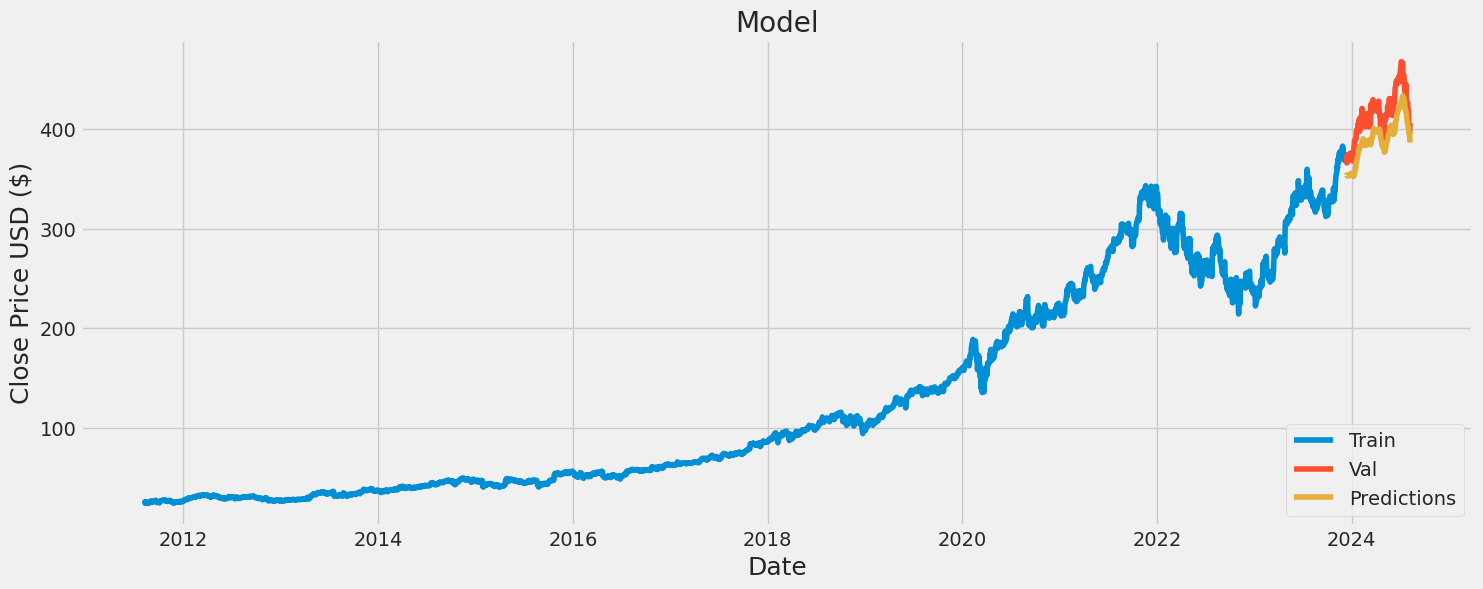

In [37]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()